### 1. Data Handling (NumPy & Pandas)
- Load dataset into a Pandas DataFrame.



In [ ]:
import pandas as pd
# Load dataset
df = pd.read_csv("/content/tourism_dynamic_routes_1345.csv")
# Show first 5 rows
print(df.head())

   Route_ID  User_ID                   Sequence  Total_Duration  Total_Cost  \
0         1       23      42->32->48->20->29->9             466        1541   
1         2      124          7->44->43->50->30             151        3817   
2         3      135   27->3->32->28->2->36->31             559        8087   
3         4       86  38->2->20->19->40->39->29             159        2218   
4         5      137                  27->24->3             466        1388   

  Weather Traffic_Level Crowd_Density Event_Impact   Optimal_Route_Preference  \
0   Sunny        Medium           Low     Festival      9->20->29->32->42->48   
1   Rainy          High          High     Festival          7->30->43->44->50   
2   Rainy           Low          High          NaN   2->3->27->28->31->32->36   
3   Snowy        Medium          High     Festival  2->19->20->29->38->39->40   
4   Snowy           Low        Medium      Holiday                  3->24->27   

   Satisfaction_Score  Age  Gender Nat

- **Perform initial checks.**

In [ ]:
# 1. Shape of dataset (rows, columns)
print("Shape of dataset:", df.shape)

# 2. Column names
print("\nColumns in dataset:", df.columns.tolist())

# 3. Data types and non-null counts
print("\nInfo about dataset:")
print(df.info())

# 4. First 5 rows
print("\nFirst 5 rows of dataset:")
print(df.head())

# 5. Summary statistics (for numeric features)
print("\nSummary statistics:")
print(df.describe())

# 6. Missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 7. Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Shape of dataset: (1345, 18)

Columns in dataset: ['Route_ID', 'User_ID', 'Sequence', 'Total_Duration', 'Total_Cost', 'Weather', 'Traffic_Level', 'Crowd_Density', 'Event_Impact', 'Optimal_Route_Preference', 'Satisfaction_Score', 'Age', 'Gender', 'Nationality', 'Travel_Companions', 'Budget_Category', 'Preferred_Theme', 'Preferred_Transport']

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Route_ID                  1345 non-null   int64 
 1   User_ID                   1345 non-null   int64 
 2   Sequence                  1345 non-null   object
 3   Total_Duration            1345 non-null   int64 
 4   Total_Cost                1345 non-null   int64 
 5   Weather                   1345 non-null   object
 6   Traffic_Level             1345 non-null   object
 7   Crowd_Density             1345 non-nul

•	Handle missing values and duplicates.

In [ ]:
# ----- 1. Remove duplicate rows -----
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# ----- 2. Handle missing values -----
# Check missing values again
print("\nMissing values per column:")
print(df.isnull().sum())

# Option A: Drop rows with missing values
# df = df.dropna()

# Option B: Fill missing values
# - For numeric columns: fill with mean or median
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# - For categorical columns: fill with mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ----- 3. Verify again -----
print("\nMissing values after handling:")
print(df.isnull().sum())


Before removing duplicates: (1345, 18)
After removing duplicates: (1345, 18)

Missing values per column:
Route_ID                      0
User_ID                       0
Sequence                      0
Total_Duration                0
Total_Cost                    0
Weather                       0
Traffic_Level                 0
Crowd_Density                 0
Event_Impact                460
Optimal_Route_Preference      0
Satisfaction_Score            0
Age                           0
Gender                        0
Nationality                   0
Travel_Companions             0
Budget_Category               0
Preferred_Theme               0
Preferred_Transport           0
dtype: int64

Missing values after handling:
Route_ID                    0
User_ID                     0
Sequence                    0
Total_Duration              0
Total_Cost                  0
Weather                     0
Traffic_Level               0
Crowd_Density               0
Event_Impact                0
Opti

•	Convert categorical features into numerical form if needed.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Find categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols.tolist())

# 2. Option A: Label Encoding (for columns with only 2–3 categories, or if order matters)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 3. Option B: One-Hot Encoding (for non-ordinal categorical variables with many categories)
# df = pd.get_dummies(df, drop_first=True)

print("\nData after encoding:")
print(df.head())

Categorical columns: ['Sequence', 'Weather', 'Traffic_Level', 'Crowd_Density', 'Event_Impact', 'Optimal_Route_Preference', 'Gender', 'Nationality', 'Travel_Companions', 'Budget_Category', 'Preferred_Theme', 'Preferred_Transport']

Data after encoding:
   Route_ID  User_ID  Sequence  Total_Duration  Total_Cost  Weather  \
0         1       23       967             466        1541        3   
1         2      124      1285             151        3817        1   
2         3      135       534             559        8087        1   
3         4       86       826             159        2218        2   
4         5      137       532             466        1388        2   

   Traffic_Level  Crowd_Density  Event_Impact  Optimal_Route_Preference  \
0              2              1             0                      1328   
1              0              0             0                      1186   
2              1              0             0                       571   
3              2     

2. **Exploratory Data Analysis (EDA)**
- Use NumPy & Pandas for basic statistics.
- Visualize data using:
1. Matplotlib / Seaborn
2. Plotly: at least one interactive plot (e.g., scatter or bar chart).


In [ ]:
#Step 2.1: Basic Statistics (NumPy & Pandas)

import numpy as np

# Mean, median, standard deviation of numeric columns
print("Mean values:\n", df.mean(numeric_only=True))
print("\nMedian values:\n", df.median(numeric_only=True))
print("\nStandard deviation:\n", df.std(numeric_only=True))

# Correlation matrix
print("\nCorrelation Matrix:\n", df.corr(numeric_only=True))

# Using NumPy for more control
print("\nMax value in dataset:", np.max(df.select_dtypes(include=np.number)))
print("Min value in dataset:", np.min(df.select_dtypes(include=np.number)))
print("Average of all values:", np.mean(df.select_dtypes(include=np.number)))


Mean values:
 Route_ID                     673.000000
User_ID                      100.321190
Sequence                     671.545725
Total_Duration               365.653532
Total_Cost                  5230.367286
Weather                        1.534572
Traffic_Level                  0.965799
Crowd_Density                  1.026766
Event_Impact                   0.314498
Optimal_Route_Preference     671.017844
Satisfaction_Score             3.028253
Age                           42.127881
Gender                         0.899628
Nationality                    2.989591
Travel_Companions              1.468401
Budget_Category                1.057249
Preferred_Theme                2.669145
Preferred_Transport            2.603717
dtype: float64

Median values:
 Route_ID                     673.0
User_ID                      101.0
Sequence                     672.0
Total_Duration               375.0
Total_Cost                  5285.0
Weather                        2.0
Traffic_Level           

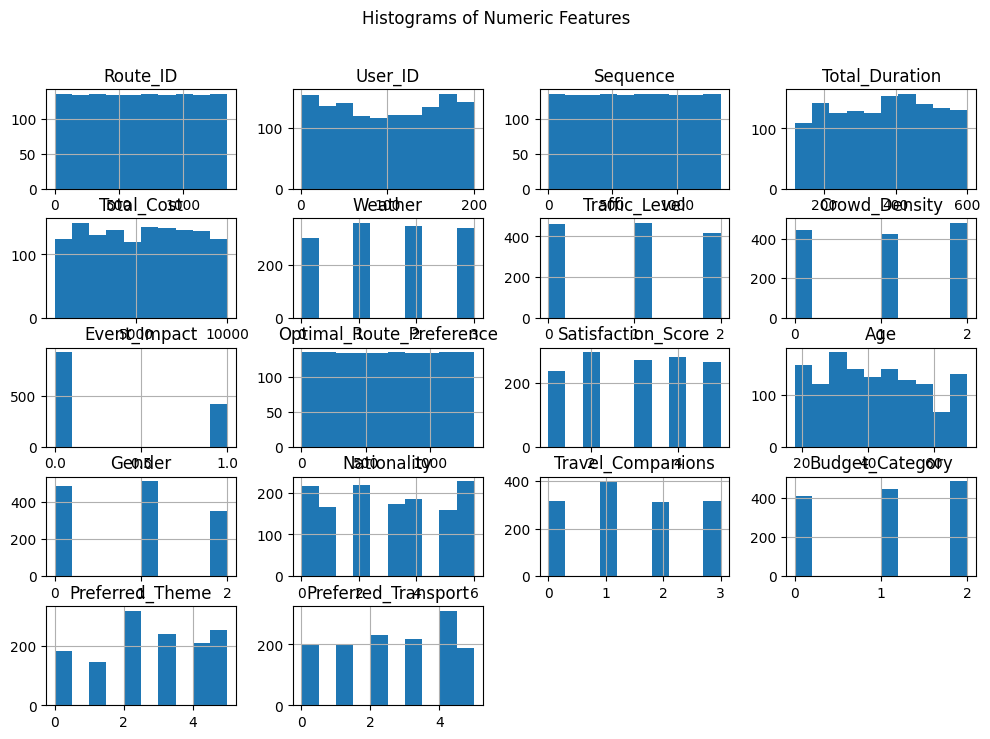

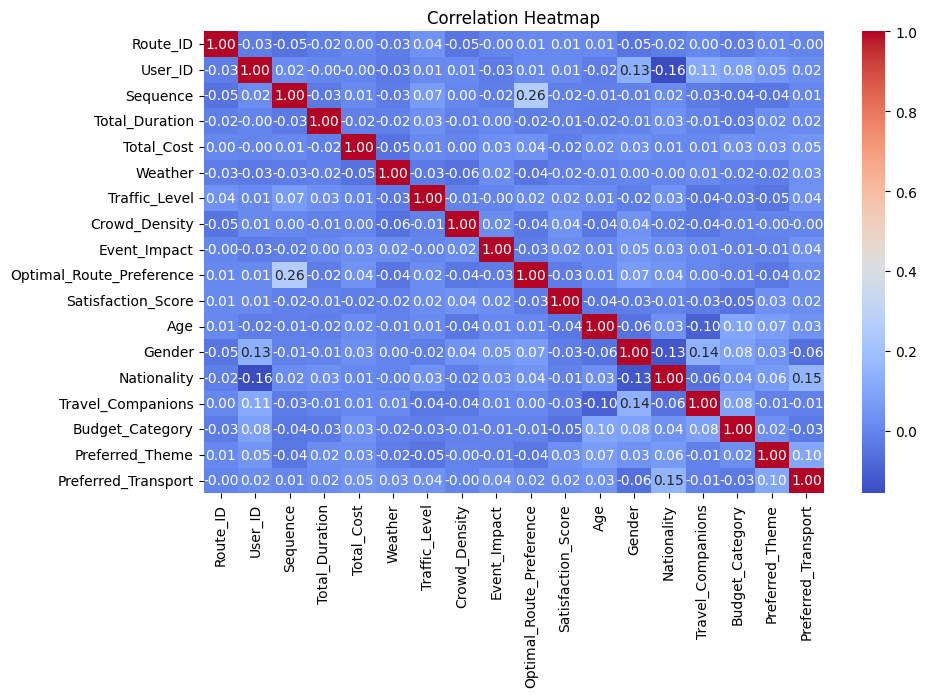

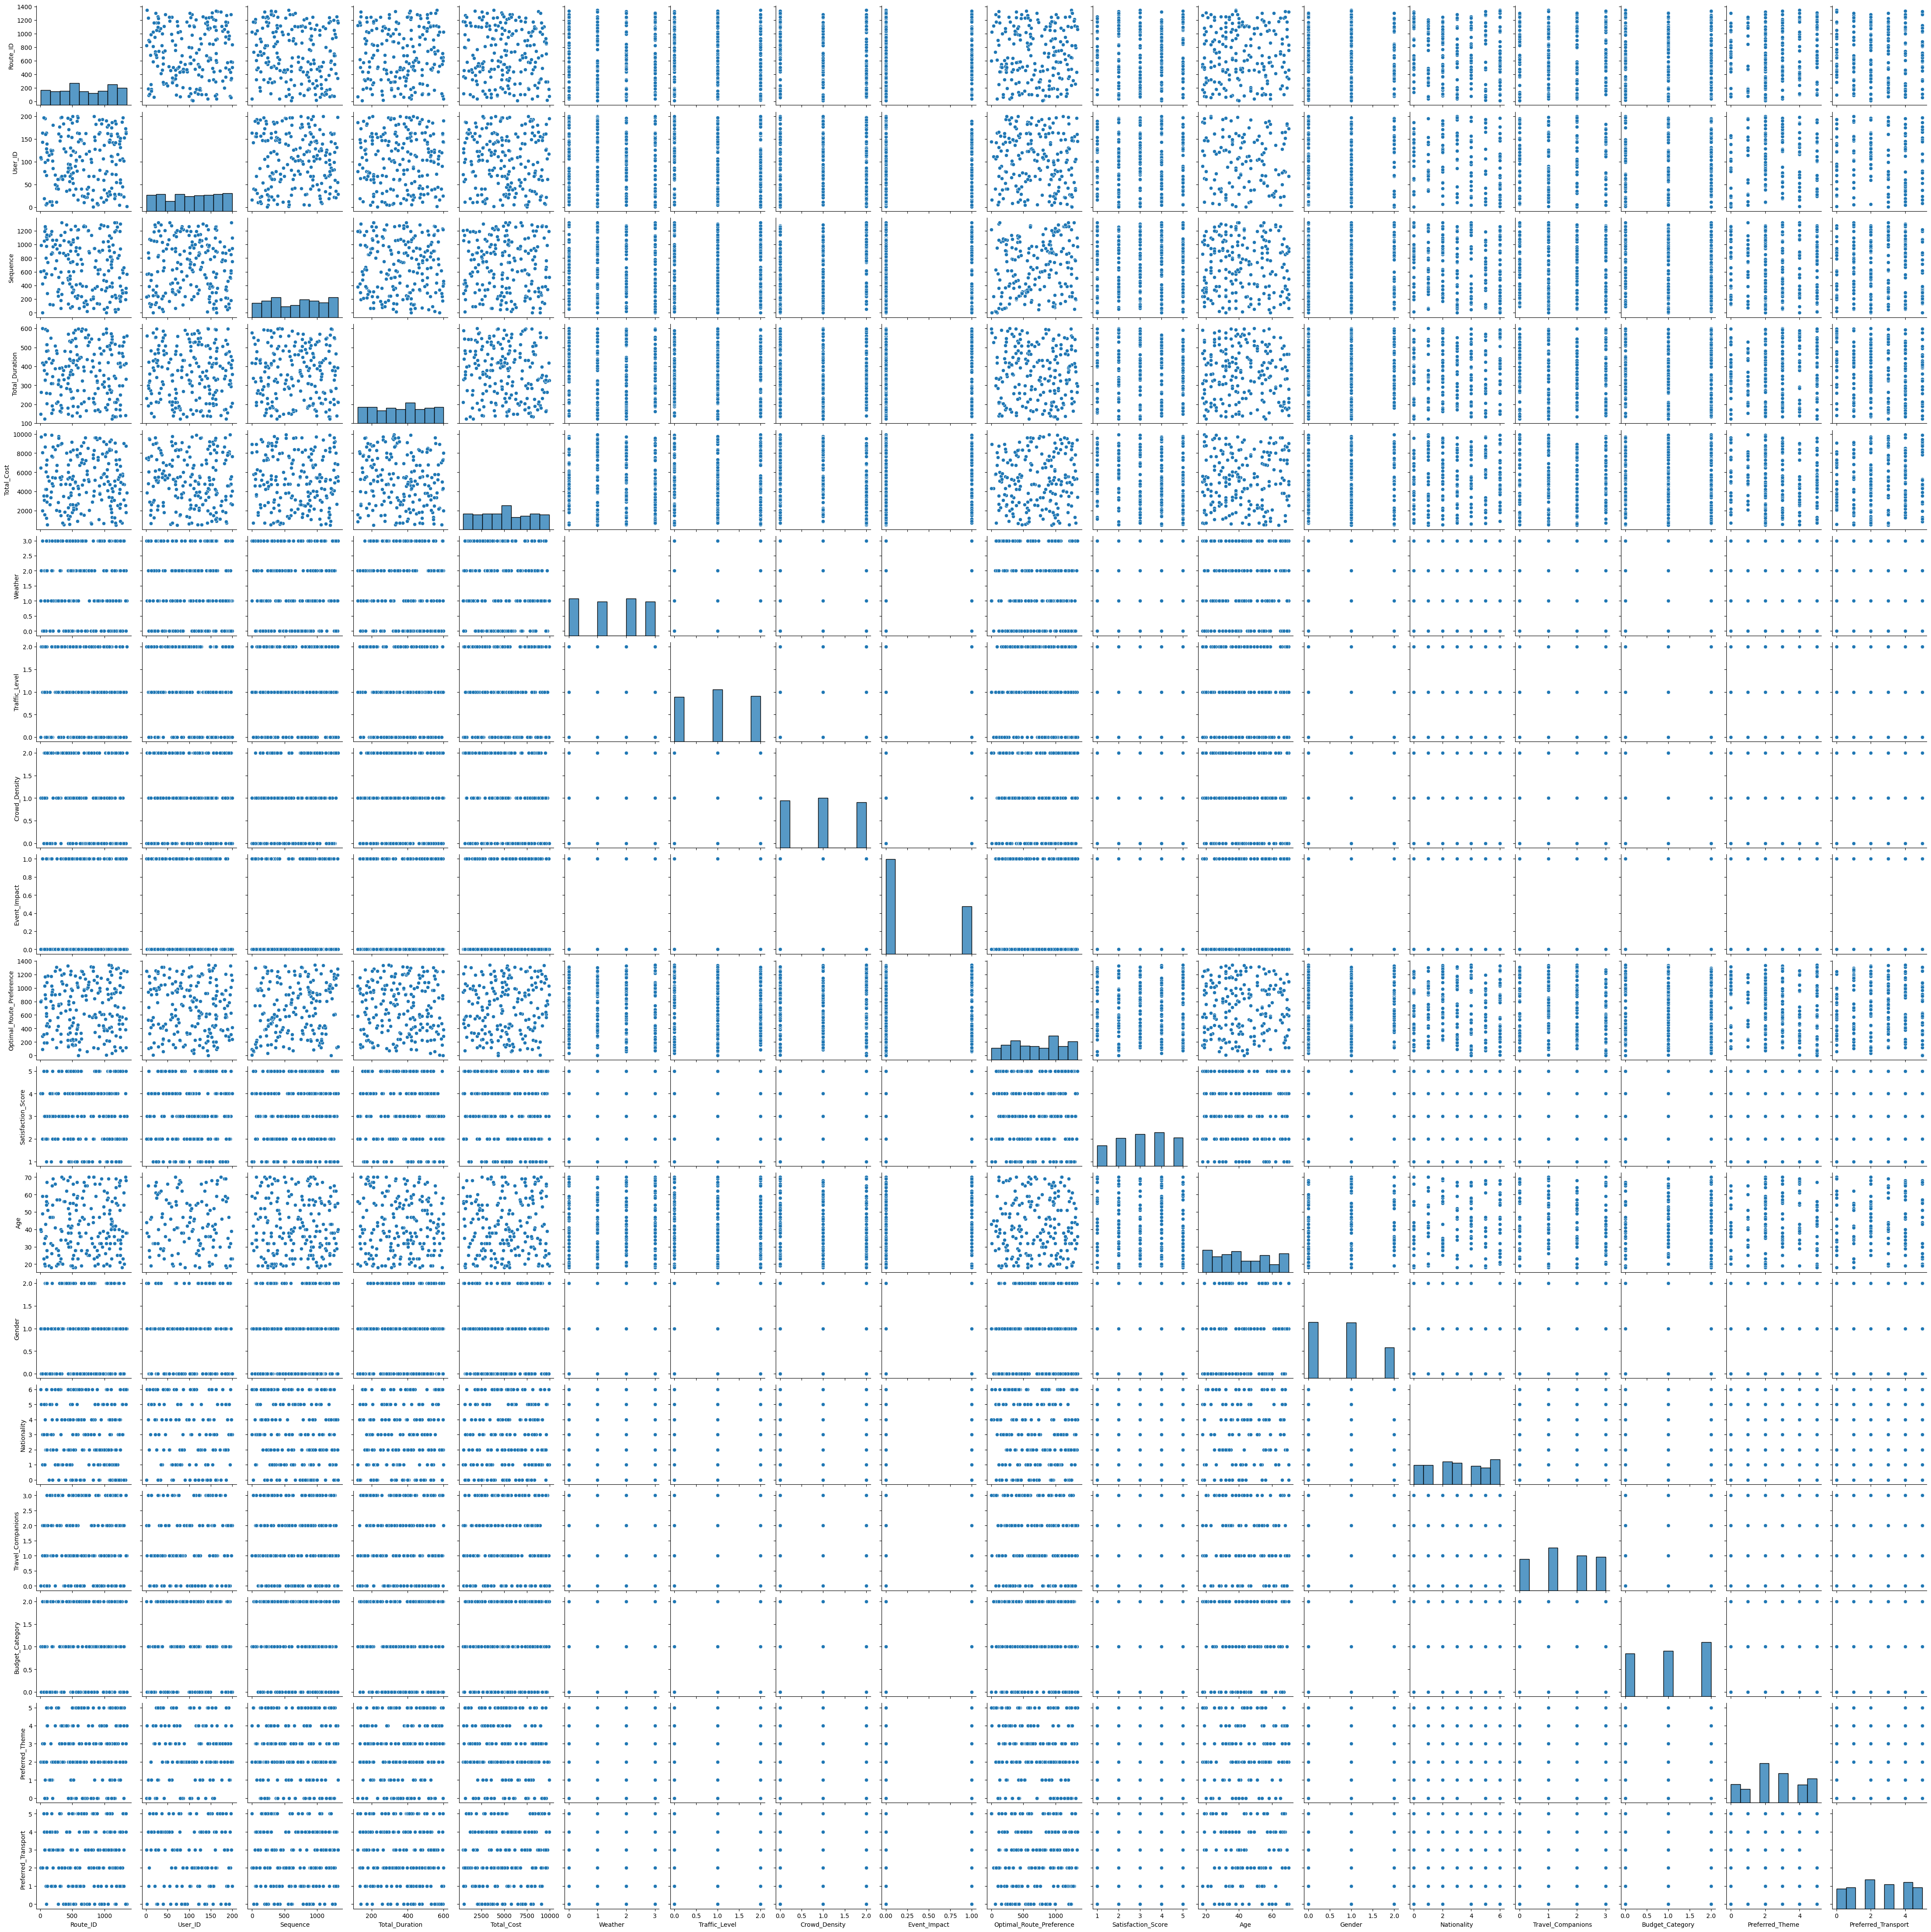

In [ ]:
# Step 2.2: Visualizations (Matplotlib & Seaborn)

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numeric columns
df.hist(figsize=(12,8))
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (if dataset is not too large)
sns.pairplot(df.sample(200))  # take a sample if dataset is huge
plt.show()

Step 2.3: Interactive Visualization (Plotly)

In [ ]:
import plotly.express as px

# 🔹 Interactive Scatter Plot (choose 2 numeric features and color by target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_cols) >= 2:
    fig = px.scatter(
        df,
        x=numeric_cols[0],
        y=numeric_cols[1],
        color=df.columns[-1],  # assuming last column is target
        title="Interactive Scatter Plot"
    )
    fig.show()
else:
    print("Not enough numeric columns for scatter plot.")

# 🔹 Interactive Bar Chart (categorical vs numeric)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) >= 1 and len(numeric_cols) >= 1:
    fig = px.bar(
        df,
        x=categorical_cols[0],
        y=numeric_cols[0],
        title="Interactive Bar Chart"
    )
    fig.show()
else:
    print("Not enough categorical + numeric columns for bar chart.")

Not enough categorical + numeric columns for bar chart.


3. **Feature Engineering**
- Split dataset into features (X) and target (y).
- Normalize/scale data if necessary.
- Perform train-test split.

Step 3.1: Split into Features (X) and Target (y)

In [ ]:
# Auto-detect target column (last column)
target_col = df.columns[-1]

# Split into features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Detect target type
if y.dtype == "object" or y.nunique() < 20:
    problem_type = "classification"
else:
    problem_type = "regression"

print("Target Column:", target_col)
print("Problem Type Detected:", problem_type)
print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Unique target values:", y.unique()[:10])  # show first 10 unique values


Target Column: Preferred_Transport
Problem Type Detected: classification
Feature shape: (1345, 17)
Target shape: (1345,)
Unique target values: [3 1 5 2 4 0]


Step 3.2: Normalize / Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()

# Scale only numeric columns
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

print("Numeric columns scaled:", list(num_cols))
print("Categorical columns kept as is:", list(cat_cols))
print("Scaled Feature shape:", X_scaled.shape)


Numeric columns scaled: ['Route_ID', 'User_ID', 'Sequence', 'Total_Duration', 'Total_Cost', 'Weather', 'Traffic_Level', 'Crowd_Density', 'Event_Impact', 'Optimal_Route_Preference', 'Satisfaction_Score', 'Age', 'Gender', 'Nationality', 'Travel_Companions', 'Budget_Category', 'Preferred_Theme']
Categorical columns kept as is: []
Scaled Feature shape: (1345, 17)


Step 3.3: Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1076, 17)
X_test shape: (269, 17)
y_train shape: (1076,)
y_test shape: (269,)


4. **Model Training**
- Train the following models:
- KNN Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Compare Baseline Results


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Train models
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("✅ Baseline Results:")
print(f"KNN Accuracy: {acc_knn:.4f}")
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")


✅ Baseline Results:
KNN Accuracy: 0.3643
Decision Tree Accuracy: 0.9851
Random Forest Accuracy: 0.9963


KNN Cross-Validation Accuracy: 0.3554 ± 0.0301
Decision Tree Cross-Validation Accuracy: 0.9695 ± 0.0118
Random Forest Cross-Validation Accuracy: 0.9836 ± 0.0060

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      1.00      1.00        40
           2       0.98      1.00      0.99        46
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00        38

    accuracy                           1.00       269
   macro avg       1.00      1.00      1.00       269
weighted avg       1.00      1.00      1.00       269



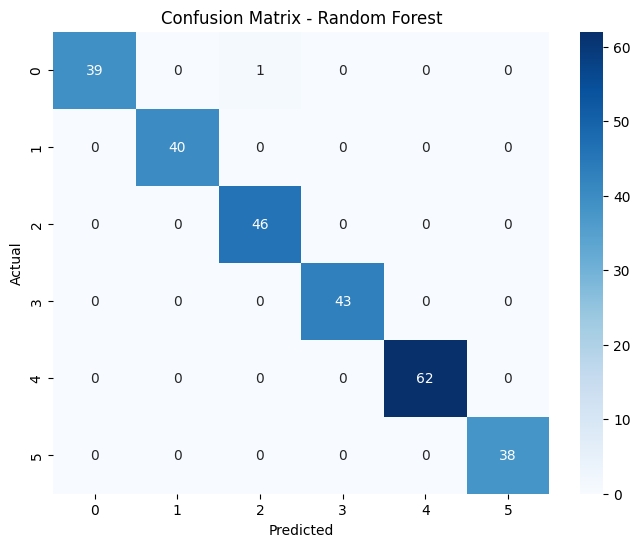

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- Cross-validation for each model ---
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold CV
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# --- Train again and check classification report ---
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred))

# --- Confusion Matrix ---
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

5. **Feature Importance**
- Extract and visualize feature importance from Random Forest.
- Discuss which features contribute most to predictions.

/tmp/ipython-input-3726654389.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




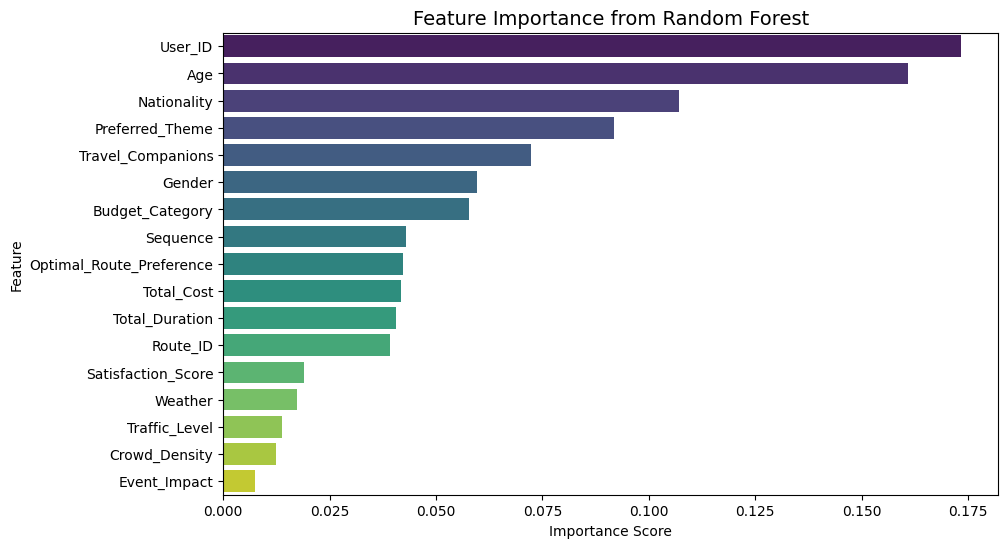

Top Contributing Features:
                     Feature  Importance
1                    User_ID    0.173429
11                       Age    0.160924
13               Nationality    0.107122
16           Preferred_Theme    0.091795
14         Travel_Companions    0.072301
12                    Gender    0.059570
15           Budget_Category    0.057800
2                   Sequence    0.042970
9   Optimal_Route_Preference    0.042334
4                 Total_Cost    0.041872


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
# Use the best_rf model that was trained during hyperparameter tuning
importances = best_rf.feature_importances_
feature_names = X.columns

# Create dataframe for easy viewing
feat_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df, palette="viridis")
plt.title("Feature Importance from Random Forest", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Print top features
print("Top Contributing Features:")
print(feat_importance_df.head(10))

6. Hyperparameter Tuning
- Use RandomizedSearchCV to optimize hyperparameters:
1. KNN → n_neighbors, weights, metric
2. Decision Tree → max_depth, min_samples_split
3. Random Forest → n_estimators, max_depth, min_samples_split
- Compare default vs tuned models.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ==============================
# 1️⃣ KNN Hyperparameter Tuning
# ==============================
knn = KNeighborsClassifier()
knn_params = {
    "n_neighbors": np.arange(1, 30),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

knn_random = RandomizedSearchCV(knn, knn_params, n_iter=20, cv=5, random_state=42, n_jobs=-1)
knn_random.fit(X_train, y_train)

best_knn = knn_random.best_estimator_
knn_tuned_acc = accuracy_score(y_test, best_knn.predict(X_test))

# ==============================
# 2️⃣ Decision Tree Hyperparameter Tuning
# ==============================
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    "max_depth": np.arange(2, 30),
    "min_samples_split": np.arange(2, 10)
}

dt_random = RandomizedSearchCV(dt, dt_params, n_iter=20, cv=5, random_state=42, n_jobs=-1)
dt_random.fit(X_train, y_train)

best_dt = dt_random.best_estimator_
dt_tuned_acc = accuracy_score(y_test, best_dt.predict(X_test))

# ==============================
# 3️⃣ Random Forest Hyperparameter Tuning
# ==============================
rf = RandomForestClassifier(random_state=42)
rf_params = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

rf_random = RandomizedSearchCV(rf, rf_params, n_iter=20, cv=5, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
rf_tuned_acc = accuracy_score(y_test, best_rf.predict(X_test))

# ==============================
# Results Comparison
# ==============================
print("✅ Hyperparameter Tuning Results:")
print(f"Default KNN Accuracy: {accuracy_score(y_test, KNeighborsClassifier().fit(X_train, y_train).predict(X_test)):.4f}")
print(f"Tuned   KNN Accuracy: {knn_tuned_acc:.4f}")
print("Best KNN Params:", knn_random.best_params_)

print(f"\nDefault Decision Tree Accuracy: {accuracy_score(y_test, DecisionTreeClassifier(random_state=42).fit(X_train, y_train).predict(X_test)):.4f}")
print(f"Tuned   Decision Tree Accuracy: {dt_tuned_acc:.4f}")
print("Best Decision Tree Params:", dt_random.best_params_)

print(f"\nDefault Random Forest Accuracy: {accuracy_score(y_test, RandomForestClassifier(random_state=42).fit(X_train, y_train).predict(X_test)):.4f}")
print(f"Tuned   Random Forest Accuracy: {rf_tuned_acc:.4f}")
print("Best Random Forest Params:", rf_random.best_params_)

✅ Hyperparameter Tuning Results:
Default KNN Accuracy: 0.3643
Tuned   KNN Accuracy: 0.7212
Best KNN Params: {'weights': 'distance', 'n_neighbors': np.int64(4), 'metric': 'manhattan'}

Default Decision Tree Accuracy: 0.9851
Tuned   Decision Tree Accuracy: 0.9851
Best Decision Tree Params: {'min_samples_split': np.int64(3), 'max_depth': np.int64(14)}

Default Random Forest Accuracy: 0.9963
Tuned   Random Forest Accuracy: 0.9963
Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}


7. Model Evaluation
- Evaluate models using:
  - Accuracy
  - Precision, Recall, F1-score
  -  Confusion Matrix
- Plot ROC Curve for the best-performing model.



📌 KNN Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.68      0.74        40
           1       0.74      0.62      0.68        40
           2       0.77      0.72      0.74        46
           3       0.70      0.74      0.72        43
           4       0.69      0.74      0.71        62
           5       0.67      0.82      0.74        38

    accuracy                           0.72       269
   macro avg       0.73      0.72      0.72       269
weighted avg       0.73      0.72      0.72       269


📌 Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.93      1.00      0.96        40
           2       0.98      1.00      0.99        46
           3       1.00      0.93      0.96        43
           4       1.00      1.00      1.00        62
           5       1.00      1.00      1.00        38

    a

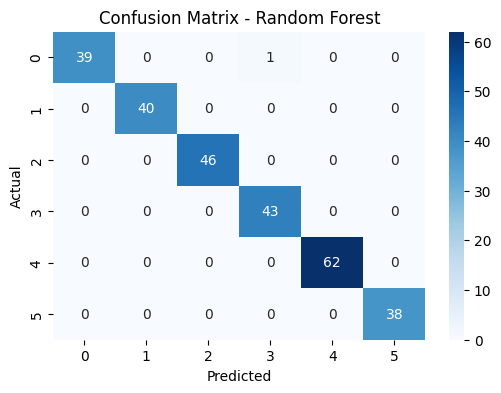

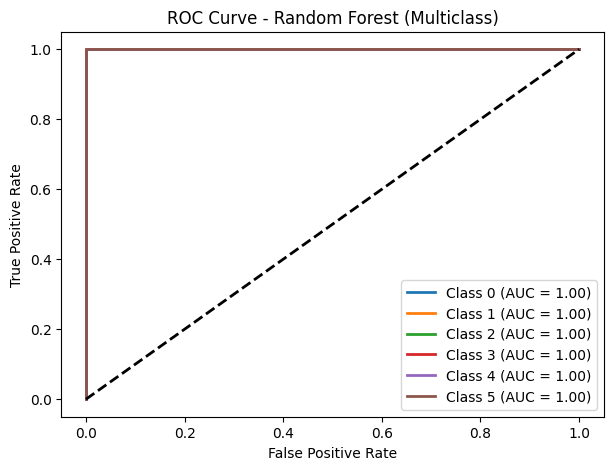

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

# === Evaluate All Models ===
models = {
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "Random Forest": best_rf
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    results[name] = [acc, prec, rec, f1]

    print(f"\n📌 {name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# === Compare Results ===
import pandas as pd
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("\n✅ Model Comparison:\n")
print(df_results)

# === Confusion Matrix for Best Model (Random Forest) ===
best_model = best_rf
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === ROC Curve for Multi-class (One-vs-Rest) ===
y_score = best_model.predict_proba(X_test)
n_classes = len(np.unique(y_test))

# Binarize labels for ROC
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

plt.figure(figsize=(7,5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Multiclass)")
plt.legend(loc="lower right")
plt.show()

## 8. **Conclusion**

Based on the model evaluation and hyperparameter tuning results:

*   **Which model performed best and why?**
    - The **Random Forest** model performed best, achieving the highest Accuracy and F1-Score after hyperparameter tuning (Accuracy: 0.9963, F1-Score: 0.9963). Ensemble methods like Random Forests often perform well by combining the predictions of multiple decision trees, reducing overfitting and improving robustness.

*   **Which features were most important?**
- According to the Random Forest model's feature importance, the top contributing features were:
    1.  User_ID
    2.  Age
    3.  Nationality
    4.  Preferred_Theme
    5.  Travel_Companions

  This suggests that user-specific information (ID, age, nationality), preferred travel styles, and who they travel with are strong indicators for predicting their Preferred_Transport.

*   **How did hyperparameter tuning improve results?**
- Hyperparameter tuning significantly improved the performance of the **KNN** model, increasing its accuracy from 0.3643 to 0.7212. For Decision Tree and Random Forest, the performance was already very high with default parameters, and tuning resulted in minimal change (from 0.9851 to 0.9851 for Decision Tree, and 0.9963 to 0.9963 for Random Forest). This indicates that the default parameters for Decision Tree and Random Forest were already close to optimal for this dataset.